In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import openpyxl
import pprint
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

##Read file

In [ ]:
print(os.listdir('/content/drive/MyDrive/code colab'))

['Danh_sach_truong_bai_1.xlsx', 'junction_postvip_sum_6mon_enr.txt']


In [ ]:
filename = open('/content/drive/MyDrive/code colab/junction_postvip_sum_6mon_enr.txt')

In [ ]:
data = pd.read_csv(filename, sep='|', index_col=None, header=None)

In [ ]:
wb = openpyxl.load_workbook('/content/drive/MyDrive/code colab/Danh_sach_truong_bai_1.xlsx')

In [ ]:
sheet = wb['Sheet1']
sheet

<Worksheet "Sheet1">

In [ ]:
def get_label(sheet):
    return([[cell.value for cell in row] for row in sheet])

all_labels = get_label(sheet['A2:A154'])
pprint.pprint(all_labels)

[['ID'],
 ['sum_total_use_charge_tn'],
 ['sum_total_use_charge_tn_1'],
 ['sum_total_use_charge_tn_2'],
 ['sum_total_use_charge_tn_3'],
 ['sum_total_use_charge_tn_4'],
 ['sum_total_use_charge_tn_5'],
 ['sum_total_A s_tn'],
 ['sum_total_A s_tn_1'],
 ['sum_total_A s_tn_2'],
 ['sum_total_A s_tn_3'],
 ['sum_total_A s_tn_4'],
 ['sum_total_A s_tn_5'],
 ['sum_free_service_fee_tn'],
 ['sum_free_service_fee_tn_1'],
 ['sum_free_service_fee_tn_2'],
 ['sum_free_service_fee_tn_3'],
 ['sum_free_service_fee_tn_4'],
 ['sum_free_service_fee_tn_5'],
 ['sum_t_A_charge_tn'],
 ['sum_t_A_charge_tn_1'],
 ['sum_t_A_charge_tn_2'],
 ['sum_t_A_charge_tn_3'],
 ['sum_t_A_charge_tn_4'],
 ['sum_t_A_charge_tn_5'],
 ['sum_t_dịch vụ B_charge_tn'],
 ['sum_t_dịch vụ B_charge_tn_1'],
 ['sum_t_dịch vụ B_charge_tn_2'],
 ['sum_t_dịch vụ B_charge_tn_3'],
 ['sum_t_dịch vụ B_charge_tn_4'],
 ['sum_t_dịch vụ B_charge_tn_5'],
 ['sum_t_dịch vụ B_times_tn'],
 ['sum_t_dịch vụ B_times_tn_1'],
 ['sum_t_dịch vụ B_times_tn_2'],
 ['sum_t_d

In [ ]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919361 entries, 0 to 919360
Columns: 153 entries, 0 to 152
dtypes: float64(150), int64(3)
memory usage: 1.0 GB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152
0,2285899345,349688.56,400264.96,366640.87,464489.95,387936.79,364476.79,559.0,682.0,601.0,943.0,629.0,553.0,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,75825.0,126765.00,101550.00,188490.00,108255.00,89295.00,12499.98,12136.38,5545.47,14636.37,20136.39,13818.21,41.0,41.0,19.0,49.0,68.0,47.0,254.0,385.0,378.0,...,12561.0,7217.0,5950.0,75825.0,126765.0,101550.0,188490.0,108255.0,89295.0,29.0,21.0,8.0,28.0,35.0,22.0,9227.22,6681.78,2545.44,8909.04,11136.30,6999.96,5.622590e+09,2.588251e+09,2.003078e+09,2.143937e+09,1.580307e+09,2.226476e+09,231.0,223.0,173.0,242.0,198.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2293856355,195987.11,224965.55,182741.57,206699.93,180660.21,183674.34,712.0,857.0,374.0,747.0,519.0,440.0,63636.3636,63636.3636,63636.3636,63636.3636,63636.3636,63636.3636,2805.0,4965.00,105.00,1245.00,660.00,765.00,31818.48,58636.92,21272.94,44091.30,23636.58,26545.71,116.0,214.0,78.0,160.0,86.0,97.0,207.0,308.0,125.0,...,81.0,44.0,51.0,2805.0,4965.0,105.0,1245.0,660.0,765.0,4.0,6.0,0.0,10.0,4.0,2.0,1272.72,1909.08,0.00,3181.80,1272.72,636.36,1.648180e+09,8.478351e+09,2.606203e+09,3.339886e+09,4.079155e+09,3.200024e+09,356.0,302.0,139.0,336.0,169.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2290588355,316340.62,322837.18,248428.44,240993.57,224259.06,207918.73,2021.0,1773.0,1205.0,1335.0,1327.0,1243.0,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,56295.0,57382.27,48701.02,67175.15,49576.94,44191.26,26863.80,39545.82,17454.69,32454.78,33318.48,22363.83,101.0,144.0,63.0,116.0,121.0,81.0,1421.0,1317.0,1104.0,...,4410.0,2791.0,2827.0,56295.0,55845.0,38520.0,66420.0,41985.0,42555.0,21.0,6.0,6.0,18.0,7.0,6.0,6681.78,1909.08,1909.08,5727.24,2227.26,1909.08,6.456024e+09,4.597626e+09,7.966665e+06,1.292456e+06,1.143210e+05,0.000000e+00,466.0,278.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2216952365,181012.38,175681.86,233540.52,155115.52,152377.36,156420.10,290.0,246.0,252.0,186.0,198.0,244.0,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,285.0,0.00,495.00,570.00,1650.00,420.00,13000.11,7954.59,13500.06,10454.61,9363.72,15545.55,47.0,28.0,47.0,37.0,34.0,63.0,84.0,74.0,77.0,...,38.0,110.0,28.0,285.0,0.0,495.0,570.0,1650.0,420.0,4.0,7.0,15.0,8.0,2.0,12.0,1272.72,2227.26,4772.70,2545.44,636.36,3818.16,1.063985e+09,2.013412e+09,1.147842e+09,6.708539e+07,1.441867e+08,9.064167e+08,126.0,111.0,94.0,25.0,33.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2221641375,334968.69,434120.10,253201.41,199496.40,126333.27,102412.77,1671.0,1717.0,1255.0,695.0,668.0,386.0,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,232605.0,333165.48,154065.00,103860.00,25515.00,7140.00,11454.60,10045.53,8227.32,4727.31,9909.18,4363.68,40.0,36.0,29.0,17.0,36.0,16.0,1259.0,1240.0,818.0,...,6924.0,1698.0,476.0,232605.0,164430.0,154065.0,103860.0,25515.0,7140.0,12.0,5.0,7.0,2.0,2.0,0.0,3818.16,1590.90,2227.26,636.36,636.36,0.00,1.897590e+09,3.428991e+09,2.340105e+09,1.506797e+09,9.960350e+08,9.723763e+08,340.0,409.0,377.0,169.0,275.0,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919356,879581167,1062387.50,301511.08,284504.65,348671.82,334709.20,316715.98,891.0,879.0,871.0,797.0,823.0,924.0,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,74625.0,93420.00,88050.00,115110.00,126300.00,95625.00,17818.28,25818.36,18727.38,13636.41,29772.84,25181.89,56.0,92.0,66.0,53.0,103.0,73.0,222.0,179.0,205.0,...,7672.0,8

In [ ]:
all_labels = np.array(all_labels)
all_labels.shape
all_labels = all_labels.flatten()

In [ ]:
all_labels.shape

(153,)

In [ ]:
data.columns = all_labels
data.head(6)

,ID,sum_total_use_charge_tn,sum_total_use_charge_tn_1,sum_total_use_charge_tn_2,sum_total_use_charge_tn_3,sum_total_use_charge_tn_4,sum_total_use_charge_tn_5,sum_total_A s_tn,sum_total_A s_tn_1,sum_total_A s_tn_2,sum_total_A s_tn_3,sum_total_A s_tn_4,sum_total_A s_tn_5,sum_free_service_fee_tn,sum_free_service_fee_tn_1,sum_free_service_fee_tn_2,sum_free_service_fee_tn_3,sum_free_service_fee_tn_4,sum_free_service_fee_tn_5,sum_t_A_charge_tn,sum_t_A_charge_tn_1,sum_t_A_charge_tn_2,sum_t_A_charge_tn_3,sum_t_A_charge_tn_4,sum_t_A_charge_tn_5,sum_t_dịch vụ B_charge_tn,sum_t_dịch vụ B_charge_tn_1,sum_t_dịch vụ B_charge_tn_2,sum_t_dịch vụ B_charge_tn_3,sum_t_dịch vụ B_charge_tn_4,sum_t_dịch vụ B_charge_tn_5,sum_t_dịch vụ B_times_tn,sum_t_dịch vụ B_times_tn_1,sum_t_dịch vụ B_times_tn_2,sum_t_dịch vụ B_times_tn_3,sum_t_dịch vụ B_times_tn_4,sum_t_dịch vụ B_times_tn_5,sum_t_A _times_tn,sum_t_A _times_tn_1,sum_t_A _times_tn_2,...,sum_G _duration_tn_3,sum_G _duration_tn_4,sum_G _duration_tn_5,sum_G _charge_tn,sum_G _charge_tn_1,sum_G _charge_tn_2,sum_G _charge_tn_3,sum_G _charge_tn_4,sum_G _charge_tn_5,sum_H_times_tn,sum_H_times_tn_1,sum_H_times_tn_2,sum_H_times_tn_3,sum_H_times_tn_4,sum_H_times_tn_5,sum_H_charge_tn,sum_H_charge_tn_1,sum_H_charge_tn_2,sum_H_charge_tn_3,sum_H_charge_tn_4,sum_H_charge_tn_5,sum_M_volume_tn,sum_M_volume_tn_1,sum_M_volume_tn_2,sum_M_volume_tn_3,sum_M_volume_tn_4,sum_M_volume_tn_5,sum_M_times_tn,sum_M_times_tn_1,sum_M_times_tn_2,sum_M_times_tn_3,sum_M_times_tn_4,sum_M_times_tn_5,sum_M_charge_tn,sum_M_charge_tn_1,sum_M_charge_tn_2,sum_M_charge_tn_3,sum_M_charge_tn_4,sum_M_charge_tn_5,churn
0,2285899345,349688.56,400264.96,366640.87,464489.95,387936.79,364476.79,559.0,682.0,601.0,943.0,629.0,553.0,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,75825.0,126765.00,101550.00,188490.00,108255.00,89295.00,12499.98,12136.38,5545.47,14636.37,20136.39,13818.21,41.0,41.0,19.0,49.0,68.0,47.0,254.0,385.0,378.0,...,12561.0,7217.0,5950.0,75825.0,126765.0,101550.0,188490.0,108255.0,89295.0,29.0,21.0,8.0,28.0,35.0,22.0,9227.22,6681.78,2545.44,8909.04,11136.30,6999.96,5.622590e+09,2.588251e+09,2.003078e+09,2.143937e+09,1.580307e+09,2.226476e+09,231.0,223.0,173.0,242.0,198.0,178.0,0.0,0.0,0.0,0.0,0.0,0.00,0
1,2293856355,195987.11,224965.55,182741.57,206699.93,180660.21,183674.34,712.0,857.0,374.0,747.0,519.0,440.0,63636.3636,63636.3636,63636.3636,63636.3636,63636.3636,63636.3636,2805.0,4965.00,105.00,1245.00,660.00,765.00,31818.48,58636.92,21272.94,44091.30,23636.58,26545.71,116.0,214.0,78.0,160.0,86.0,97.0,207.0,308.0,125.0,...,81.0,44.0,51.0,2805.0,4965.0,105.0,1245.0,660.0,765.0,4.0,6.0,0.0,10.0,4.0,2.0,1272.72,1909.08,0.00,3181.80,1272.72,636.36,1.648180e+09,8.478351e+09,2.606203e+09,3.339886e+09,4.079155e+09,3.200024e+09,356.0,302.0,139.0,336.0,169.0,138.0,0.0,0.0,0.0,0.0,0.0,0.00,0
2,2290588355,316340.62,322837.18,248428.44,240993.57,224259.06,207918.73,2021.0,1773.0,1205.0,1335.0,1327.0,1243.0,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,56295.0,57382.27,48701.02,67175.15,49576.94,44191.26,26863.80,39545.82,17454.69,32454.78,33318.48,22363.83,101.0,144.0,63.0,116.0,121.0,81.0,1421.0,1317.0,1104.0,...,4410.0,2791.0,2827.0,56295.0,55845.0,38520.0,66420.0,41985.0,42555.0,21.0,6.0,6.0,18.0,7.0,6.0,6681.78,1909.08,1909.08,5727.24,2227.26,1909.08,6.456024e+09,4.597626e+09,7.966665e+06,1.292456e+06,1.143210e+05,0.000000e+00,466.0,278.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
3,2216952365,181012.38,175681.86,233540.52,155115.52,152377.36,156420.10,290.0,246.0,252.0,186.0,198.0,244.0,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,285.0,0.00,495.00,570.00,1650.00,420.00,13000.11,7954.59,13500.06,10454.61,9363.72,15545.55,47.0,28.0,47.0,37.0,34.0,63.0,84.0,74.0,77.0,...,38.0,110.0,28.0,285.0,0.0,495.0,570.0,1650.0,420.0,4.0,7.0,15.0,8.0,2.0,12.0,1272.72,2227.26,4772.70,2545.44,636.36,3818.16,1.063985e+09,2.013412e+09,1.147842e+09,6.708539e+07,1.441867e+08,9.064167e

In [ ]:
data.describe()

,ID,sum_total_use_charge_tn,sum_total_use_charge_tn_1,sum_total_use_charge_tn_2,sum_total_use_charge_tn_3,sum_total_use_charge_tn_4,sum_total_use_charge_tn_5,sum_total_A s_tn,sum_total_A s_tn_1,sum_total_A s_tn_2,sum_total_A s_tn_3,sum_total_A s_tn_4,sum_total_A s_tn_5,sum_free_service_fee_tn,sum_free_service_fee_tn_1,sum_free_service_fee_tn_2,sum_free_service_fee_tn_3,sum_free_service_fee_tn_4,sum_free_service_fee_tn_5,sum_t_A_charge_tn,sum_t_A_charge_tn_1,sum_t_A_charge_tn_2,sum_t_A_charge_tn_3,sum_t_A_charge_tn_4,sum_t_A_charge_tn_5,sum_t_dịch vụ B_charge_tn,sum_t_dịch vụ B_charge_tn_1,sum_t_dịch vụ B_charge_tn_2,sum_t_dịch vụ B_charge_tn_3,sum_t_dịch vụ B_charge_tn_4,sum_t_dịch vụ B_charge_tn_5,sum_t_dịch vụ B_times_tn,sum_t_dịch vụ B_times_tn_1,sum_t_dịch vụ B_times_tn_2,sum_t_dịch vụ B_times_tn_3,sum_t_dịch vụ B_times_tn_4,sum_t_dịch vụ B_times_tn_5,sum_t_A _times_tn,sum_t_A _times_tn_1,sum_t_A _times_tn_2,...,sum_G _duration_tn_3,sum_G _duration_tn_4,sum_G _duration_tn_5,sum_G _charge_tn,sum_G _charge_tn_1,sum_G _charge_tn_2,sum_G _charge_tn_3,sum_G _charge_tn_4,sum_G _charge_tn_5,sum_H_times_tn,sum_H_times_tn_1,sum_H_times_tn_2,sum_H_times_tn_3,sum_H_times_tn_4,sum_H_times_tn_5,sum_H_charge_tn,sum_H_charge_tn_1,sum_H_charge_tn_2,sum_H_charge_tn_3,sum_H_charge_tn_4,sum_H_charge_tn_5,sum_M_volume_tn,sum_M_volume_tn_1,sum_M_volume_tn_2,sum_M_volume_tn_3,sum_M_volume_tn_4,sum_M_volume_tn_5,sum_M_times_tn,sum_M_times_tn_1,sum_M_times_tn_2,sum_M_times_tn_3,sum_M_times_tn_4,sum_M_times_tn_5,sum_M_charge_tn,sum_M_charge_tn_1,sum_M_charge_tn_2,sum_M_charge_tn_3,sum_M_charge_tn_4,sum_M_charge_tn_5,churn
count,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000,919361.000000,919361.000000,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,...,919361.000000,919361.000000,919361.000000,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000,919361.000000,919361.000000,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000
mean,1.570801e+09,2.084550e+05,2.116848e+05,2.106786e+05,2.169524e+05,2.122774e+05,2.151770e+05,618.990584,626.694941,622.522938,6.514633e+02,6.243340e+02,6.367135e+02,8.703543e+04,8.814898e+04,8.839033e+04,8.842119e+04,8.839554e+04,8.660973e+04,5.902075e+04,5.971742e+04,5.946986e+04,6.434511e+04,6.061847e+04,6.250799e+04,1.648005e+04,1.722180e+04,1.732411e+04,1.768870e+04,1.663158e+04,1.684698e+04,60.498067,63.432966,63.876470,65.169268,60.905014,61.759147,316.436448,319.600349,322.479529,...,3366.201597,3187.379650,3216.726231,4.325933e+04,4.414272e+04,4.413850e+04,4.717459e+04,4.458929e+04,4.514138e+04,15.193299,15.982011,16.177130,16.272252,15.012387,15.193745,4.643228e+03,4.836030e+03,4.887521e+03,4.937459e+03,4.599621e+03,4.678444e+03,2.185891e+09,2.179904e+09,1.997559e+09,1.516975e+09,1.451353e+09,1.427577e+09,208.019405,209.405338,203.027446,2.100034e+02,2.005166e+02,2.068003e+02,1.160021e+03,1.217040e+03,1.331257e+03,1.350054e+03,1.366997e+03,1.432062e+03,0.025536
std,2.171216e+09,2.106080e+05,2.133047e+05,2.230109e+05,2.185888e+05,2.355795e+05,2.177488e+05,2150.132833,2259.125389,2231.992389,2.448619e+03,2.478708e+03,2.689361e+03,6.398582e+04,6.455670e+04,6.486937e+04,6.470401e+04,6.448116e+04,6.314379e+04,1.473730e+05,1.473555e+05,1.536136e+05,1.586172e+05,1.758777

##Fix file

In [ ]:
data = data.drop(['ID','customer_age'],axis=1)

In [ ]:
cus_out = data.loc[data['churn'] == 1]
cus_use = data.loc[data['churn'] == 0]

##Service A

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
def slice_month(cus_out, cus_use, name_column):
  list_out = cus_out[name_column].mean()
  list_use = cus_use[name_column].mean()
  df_data =  pd.DataFrame({"x": [1,2,3,4,5,6], "use" : list_use.values ,"out" : list_out.values})
  return df_data

In [ ]:
#Tổng tiền sử dụng dịch vụ A "sum_t_A_charge_tn"
name_column_ChaA = ['sum_t_A_charge_tn_5','sum_t_A_charge_tn_4','sum_t_A_charge_tn_3','sum_t_A_charge_tn_2','sum_t_A_charge_tn_1','sum_t_A_charge_tn']
df_ChaA = slice_month(cus_out, cus_use, name_column_ChaA)

In [ ]:
df_ChaA

,x,use,out
0,1,62954.877241,45454.901483
1,2,61041.635293,44470.592835
2,3,64778.372034,47811.968999
3,4,59853.903398,44814.806384
4,5,60248.639730,39445.968017
5,6,59975.641871,22581.859350


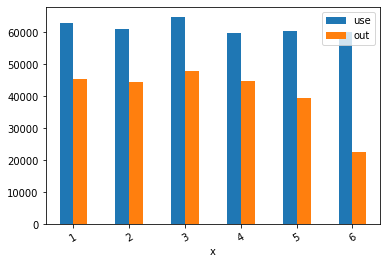

In [ ]:
df_ChaA.plot.bar(x='x', y=['use','out'], rot=30)

* Khi giá dịch vụ giảm thì số người rời bỏ khá đã giảm, do vậy ở dịch vụ A ta cần điều chỉnh giá dịch vụ để dữ chân khách hàng.

In [ ]:
# Tổng phí dịch vụ A (sum_t_A_charge_tn)
name_column_ChaA = ['sum_t_A_charge_tn_5','sum_t_A_charge_tn_4','sum_t_A_charge_tn_3','sum_t_A_charge_tn_2','sum_t_A_charge_tn_1','sum_t_A_charge_tn']
df_ChaA = slice_month(cus_out, cus_use, name_column_ChaA)

In [ ]:
#Tổng số lần sử dụng dịch vụ A (bao gồm cả có phí vs miễn phí)
Time_A = data.iloc[:,36:42]
Rev_TimeA = sorted(Time_A, reverse=True)

sum_t_A _times_tn      316.436448
sum_t_A _times_tn_1    319.600349
sum_t_A _times_tn_2    322.479529
sum_t_A _times_tn_3    341.897893
sum_t_A _times_tn_4    329.848540
sum_t_A _times_tn_5    334.627651
dtype: float64

In [ ]:
#Tổng số lần sử dụng dịch vụ A (có phí)
Totaluse_A = data.iloc[:,42:48]
Rev_TotaluseA = sorted(Totaluse_A, reverse=True)
Totaluse_A.mean()

sum_total_use_A s_tn      588.898337
sum_total_use_A s_tn_1    596.281201
sum_total_use_A s_tn_2    593.017148
sum_total_use_A s_tn_3    620.607841
sum_total_use_A s_tn_4    594.841562
sum_total_use_A s_tn_5    606.742167
dtype: float64

In [ ]:
#Tổng thời lượng sử dụng sử dụng dịch vụ A
Dur_A = data.iloc[:,48:54]
Rev_DurA = sorted(Dur_A, reverse=True)

sum_t_A _duration_tn      22237.206151
sum_t_A _duration_tn_1    22641.254570
sum_t_A _duration_tn_2    22736.278349
sum_t_A _duration_tn_3    24286.213369
sum_t_A _duration_tn_4    23500.113238
sum_t_A _duration_tn_5    23914.673051
dtype: float64

In [ ]:
def draw_chart(data_s, Totaluse_A, Time_A, title):
  total = []
  times = []
  
  for col in Totaluse_A:
    if col in data_s.columns:
      total.append(np.mean(data_s[col]))
  print(total)

  for col in Time_A:
    if col in data_s.columns:
      times.append(np.mean(data_s[col]))
  print(times)
  
  fig, ax = plt.subplots(figsize=[9, 7])
  
  ax.plot([1,2,3,4,5,6],
          total,
          color='g', linestyle='--', marker='^', label = 'Total')
 
  plt.legend(loc='best')
  plt.xticks(rotation=60)
  ax.set_xlabel('Month', fontsize=15)
  ax.set_ylabel('VND',  color='blue', fontsize=15)
  
  ax2 = ax.twinx()
  ax2.plot([1,2,3,4,5,6],
          times,
          color='r', linestyle='--', marker='x', label='Times')

  ax2.set_ylabel('Times', color='red', fontsize=15)

  plt.title(title, fontsize=15)
  plt.legend(loc='right')
  plt.show()

[483.56668228478935, 464.6304042254121, 479.53128593943006, 446.96894833241043, 395.68134770200624, 225.7751842228564]
[284.7559313370533, 276.3845039826213, 281.1059334667973, 257.3019976998765, 224.54892021978958, 130.61792392554415]


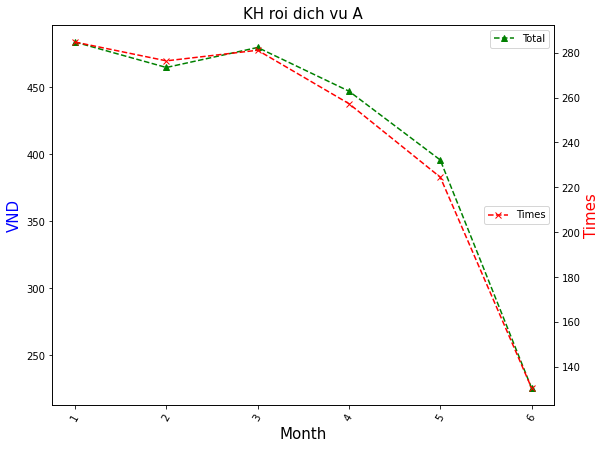

[609.9700296020467, 598.2537973666233, 624.3048084350206, 596.8443994981493, 601.5380004554161, 598.4141250429743]
[335.93455960816357, 331.2495870001027, 343.49097092927207, 324.18753209120825, 322.0912093529966, 321.3058967455608]


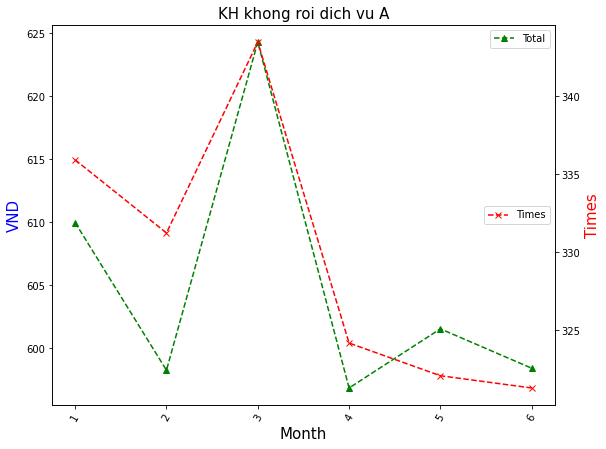

In [ ]:
draw_chart(cus_out, Rev_TotaluseA, Rev_TimeA, 'KH roi dich vu A')
draw_chart(cus_use, Rev_TotaluseA, Rev_TimeA, 'KH khong roi dich vu A')

In [ ]:
def draw_chart(data_s, Cha_A, Dur_A, title):
  charg = []
  duration = []
  
  for col in Cha_A:
    if col in data_s.columns:
      charg.append(np.mean(data_s[col]))
  print(charg)

  for col in Dur_A:
    if col in data_s.columns:
      duration.append(np.mean(data_s[col]))
  print(duration)
  
  fig, ax = plt.subplots(figsize=[9, 7])
  
  ax.plot([1,2,3,4,5,6],
          duration,
          color='g', linestyle='--', marker='^', label = 'Duration')
 
  plt.legend(loc='best')
  plt.xticks(rotation=60)
  ax.set_xlabel('Month', fontsize=15)
  ax.set_ylabel('VND',  color='blue', fontsize=15)
  
  ax2 = ax.twinx()
  ax2.plot([1,2,3,4,5,6],
          charg,
          color='r', linestyle='--', marker='x', label='Charge')

  ax2.set_ylabel('Times', color='red', fontsize=15)

  plt.title(title, fontsize=15)
  plt.legend(loc='right')
  plt.show()

[45454.90148315373, 44470.592835115254, 47811.96899944634, 44814.80638369465, 39445.96801678219, 22581.859349576207]
[22127.45989692039, 21454.931464837926, 21792.886740213828, 19861.6785790348, 17361.3759850066, 9864.03126464199]


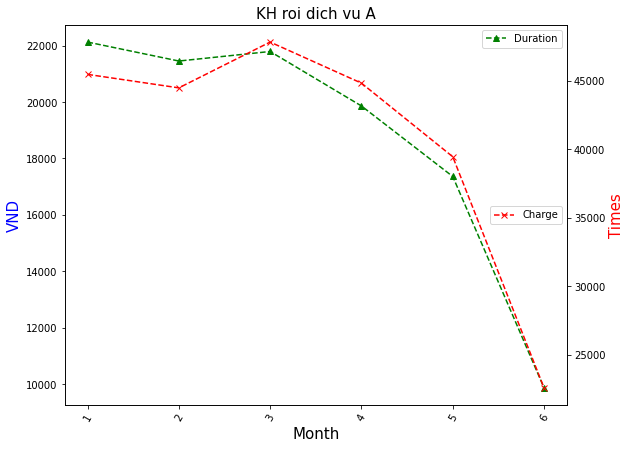

[62954.87724069224, 61041.63529305233, 64778.372033800755, 59853.903398006376, 60248.63973033354, 59975.641870789565]
[23961.5076896116, 23553.70804814016, 24351.55199445464, 22811.608390148725, 22779.61590897929, 22561.450167655636]


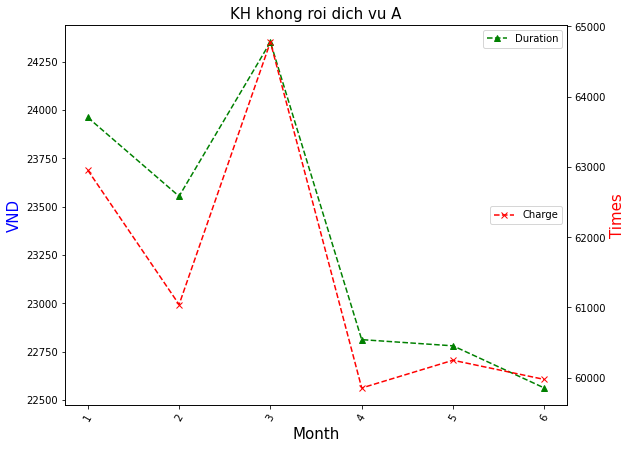

In [ ]:
draw_chart(cus_out, Rev_ChaA, Rev_DurA, 'KH roi dich vu A')
draw_chart(cus_use, Rev_ChaA, Rev_DurA, 'KH khong roi dich vu A')

##Service E

In [ ]:
#Tổng số lần sử dụng dịch vụ E
Time_E = data.iloc[:,72:78]
# Time_E = Time_E.mean().values
Rev_TimeE = sorted(Time_E, reverse=True)
# Rev_TimeE = np.array(Rev_TimeE)
# Rev_TimeE = Rev_TimeE.reshape(1,-1)
# Rev_TimeE

In [ ]:
#Tổng thời gian sử dụng dịch vụ E
Dur_E = data.iloc[:,78:84]
# Dur_E = Dur_E.mean().values
Rev_DurE = sorted(Dur_E, reverse=True)

In [ ]:
#Tổng phí dịch vụ E
Cha_E = data.iloc[:,96:102]
Rev_ChaE = sorted(Cha_E, reverse=True)

In [ ]:
def draw_chart(data_s, Cha_E, Dur_E, Time_E, title):
  charg = []
  times = []
  duration = []
  
  for col in Cha_E:
    if col in data_s.columns:
      charg.append(np.mean(data_s[col]))
  print(charg)
  for col in Dur_E:
    if col in data_s.columns:
      duration.append(np.mean(data_s[col]))
  print(duration)
  for col in Time_E:
    if col in data_s.columns:
      times.append(np.mean(data_s[col]))
  print(times)
  
  fig, ax = plt.subplots(figsize=[9, 7])
  
  ax.plot([1,2,3,4,5,6],
          charg,
          color='g', linestyle='--', marker='^', label = 'Charge')
  ax.plot([1,2,3,4,5,6],
          duration,
          color='b', linestyle='--', marker='o', label = 'Duration')
  plt.legend(loc='best')
  plt.xticks(rotation=60)
  ax.set_xlabel('Month', fontsize=15)
  ax.set_ylabel('VND',  color='blue', fontsize=15)
  
  ax2 = ax.twinx()
  ax2.plot([1,2,3,4,5,6],
          times,
          color='r', linestyle='--', marker='x', label='Times')

  ax2.set_ylabel('Times', color='red', fontsize=15)

  plt.title(title, fontsize=15)
  plt.legend(loc='right')
  plt.show()

[14450.607154236033, 13911.922557396621, 15815.420103931496, 14831.659443284901, 14062.415831665026, 9169.882082037708]
[19875.30331814116, 19232.218000596327, 19474.17898368616, 17685.090514120202, 15506.954167909018, 8920.259317630022]
[246.0325424883929, 237.68777952890062, 241.23146057843846, 220.06521276142607, 192.70400817821698, 113.91029518251906]


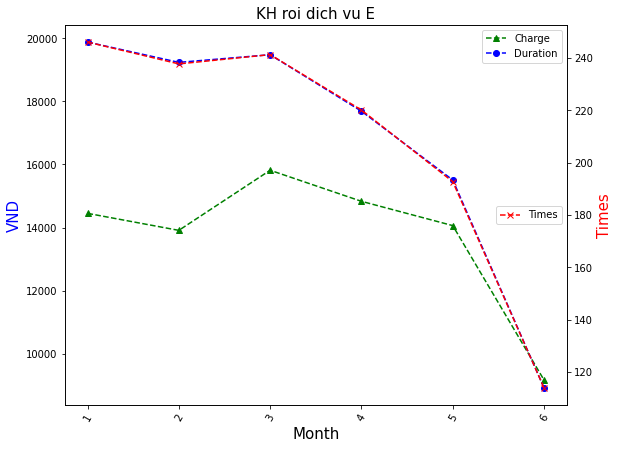

[16794.43301496638, 15475.757677735175, 16616.87252235766, 14821.45018810431, 15077.11532855818, 15425.483475595076]
[20706.457161864706, 20328.94206616035, 20945.830393220553, 19618.364054944614, 19577.28649244768, 19400.36271102062]
[279.841675931259, 275.41018591692676, 284.8895381544932, 268.4392901313116, 266.2992273553273, 266.1682583905952]


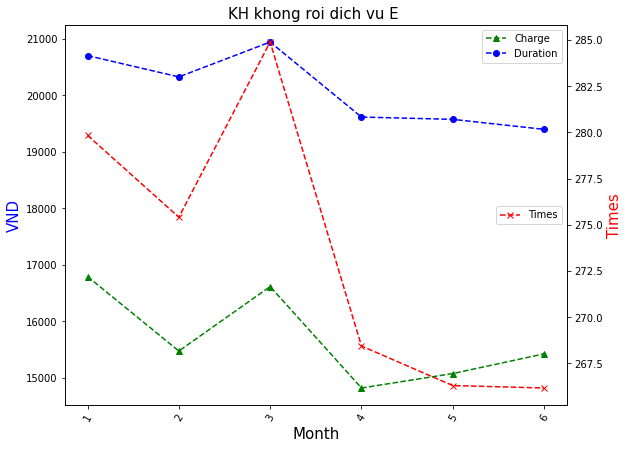

In [ ]:
draw_chart(cus_out, Rev_ChaE, Rev_DurE, Rev_TimeE, 'KH roi dich vu E')
draw_chart(cus_use, Rev_ChaE, Rev_DurE, Rev_TimeE, 'KH khong roi dich vu E ')

#Service F

In [ ]:
#Tổng số lần sử dụng dịch vụ F
Time_F = data.iloc[:,84:90]
Rev_TimeF = sorted(Time_F, reverse=True)

In [ ]:
#Tổng phí dịch vụ F
Cha_F = data.iloc[:,90:96]
Rev_ChaF = sorted(Cha_F, reverse=True)

In [ ]:
def draw_chart(data_s, Cha_F, Time_F, title):
  charg = []
  times = []
  
  for col in Cha_F:
    if col in data_s.columns:
      charg.append(np.mean(data_s[col]))
  print(charg)

  for col in Time_F:
    if col in data_s.columns:
      times.append(np.mean(data_s[col]))
  print(times)
  
  fig, ax = plt.subplots(figsize=[9, 7])
  
  ax.plot([1,2,3,4,5,6],
          charg,
          color='g', linestyle='--', marker='^', label = 'Charge')
 
  plt.legend(loc='best')
  plt.xticks(rotation=60)
  ax.set_xlabel('Month', fontsize=15)
  ax.set_ylabel('VND',  color='blue', fontsize=15)
  
  ax2 = ax.twinx()
  ax2.plot([1,2,3,4,5,6],
          times,
          color='r', linestyle='--', marker='x', label='Times')

  ax2.set_ylabel('Times', color='red', fontsize=15)

  plt.title(title, fontsize=15)
  plt.legend(loc='right')
  plt.show()

[10822.166172849862, 11054.109231162247, 11689.902258380385, 11412.537114622608, 9826.272428333983, 4985.393342420193]
[43.60919197512459, 44.18775823146058, 46.83251693146484, 45.70234697789326, 39.56463773054479, 19.435873408016356]


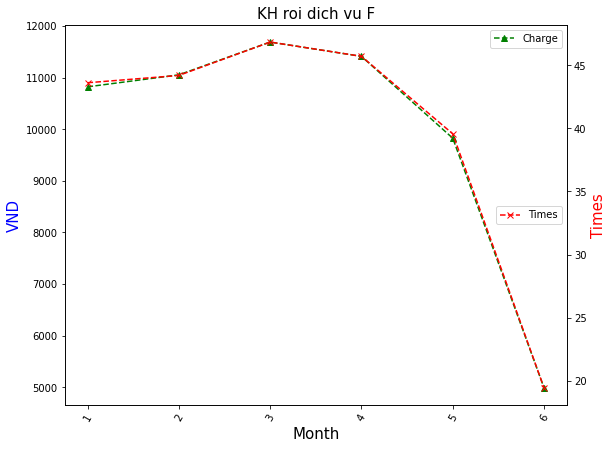

[11625.794966796278, 11488.972009258861, 12210.894525074946, 11893.374187576, 11861.007457708994, 11444.608780838791]
[46.34034205321225, 45.63988529765014, 48.65490956418465, 47.45895339128727, 47.36781324367887, 45.70241683075041]


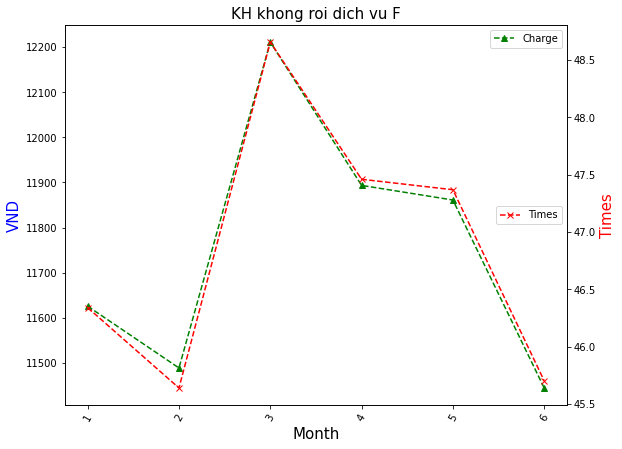

In [ ]:
draw_chart(cus_out, Rev_ChaF, Rev_TimeF, 'KH roi dich vu F')
draw_chart(cus_use, Rev_ChaF, Rev_TimeF, 'KH khong roi dich vu F')

#Service G

In [ ]:
#Tổng số lần sử dụng dịch vụ G
Time_G = data.iloc[:,102:108]
Rev_TimeG = sorted(Time_G, reverse=True)

In [ ]:
#Tổng thời gian sử dụng dịch vụ G
Dur_G = data.iloc[:,108:114]
Rev_DurG = sorted(Dur_G, reverse=True)

In [ ]:
#Tổng phí dịch vụ G
Cha_G = data.iloc[:,114:120]
Rev_ChaG = sorted(Cha_G, reverse=True)

In [ ]:
def draw_chart(data_s, Cha_G, Dur_G, Time_G, title):
  charg = []
  times = []
  duration = []
  
  for col in Cha_G:
    if col in data_s.columns:
      charg.append(np.mean(data_s[col]))
  print(charg)
  for col in Dur_G:
    if col in data_s.columns:
      duration.append(np.mean(data_s[col]))
  print(duration)
  for col in Time_G:
    if col in data_s.columns:
      times.append(np.mean(data_s[col]))
  print(times)
  
  fig, ax = plt.subplots(figsize=[9, 7])
  
  ax.plot([1,2,3,4,5,6],
          charg,
          color='g', linestyle='--', marker='^', label = 'Charge')
  ax.plot([1,2,3,4,5,6],
          duration,
          color='b', linestyle='--', marker='o', label = 'Duration')
  plt.legend(loc='best')
  plt.xticks(rotation=60)
  ax.set_xlabel('Month', fontsize=15)
  ax.set_ylabel('VND',  color='blue', fontsize=15)
  
  ax2 = ax.twinx()
  ax2.plot([1,2,3,4,5,6],
          times,
          color='r', linestyle='--', marker='x', label='Times')

  ax2.set_ylabel('Times', color='red', fontsize=15)

  plt.title(title, fontsize=15)
  plt.legend(loc='right')
  plt.show()

[30558.1824185373, 30148.555959449684, 31556.700037483482, 29610.392623418662, 25097.816084252674, 13299.204317417049]
[2243.4144907782083, 2214.4340844230524, 2310.0895770328407, 2168.8020615921964, 1848.7228777100993, 941.2605954764238]
[38.63986028879329, 38.60310090727095, 39.794479703539636, 37.15649358947054, 31.788984964007327, 16.679345742641736]


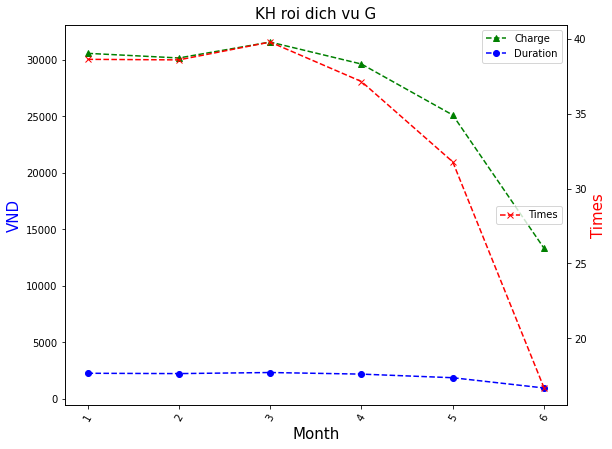

[45523.53473084684, 44967.71380593935, 47583.86116755078, 44519.21731629317, 44641.800069506775, 44044.44840872259]
[3242.2322555152227, 3212.8760788227046, 3393.877436141286, 3182.7154598139937, 3191.8142348786228, 3150.9022005081015]
[55.96352429555612, 55.715130530291866, 58.48418768501279, 55.64195587821638, 55.687813377624785, 55.03563854248988]


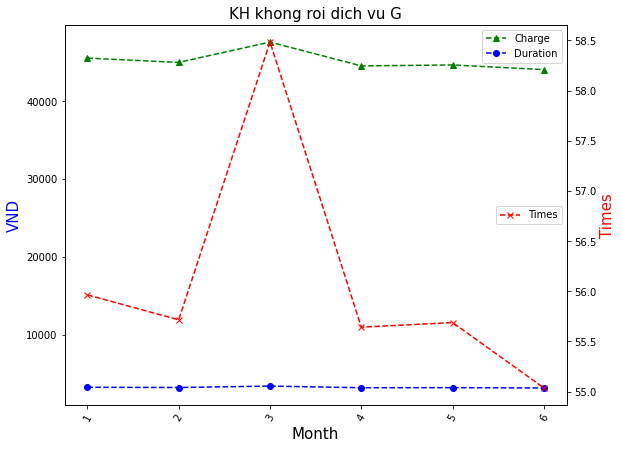

In [ ]:
draw_chart(cus_out, Rev_ChaG, Rev_DurG, Rev_TimeG, 'KH roi dich vu G')
draw_chart(cus_use, Rev_ChaG, Rev_DurG, Rev_TimeG, 'KH khong roi dich vu G')

#Service H

In [ ]:
#Tổng số lần sử dụng dịch vụ H
Time_H = data.iloc[:,120:126]
Rev_TimeH = sorted(Time_H, reverse=True)

In [ ]:
#Tổng phí dịch vụ H
Cha_H = data.iloc[:,126:132]
Rev_ChaH = sorted(Cha_H, reverse=True)

In [ ]:
def draw_chart(data_s, Cha_H, Time_H, title):
  charg = []
  times = []
  duration = []
  
  for col in Cha_H:
    if col in data_s.columns:
      charg.append(np.mean(data_s[col]))
  print(charg)

  for col in Time_H:
    if col in data_s.columns:
      times.append(np.mean(data_s[col]))
  print(times)
  
  fig, ax = plt.subplots(figsize=[9, 7])
  
  ax.plot([1,2,3,4,5,6],
          charg,
          color='g', linestyle='--', marker='^', label = 'Charge')
 
  plt.legend(loc='best')
  plt.xticks(rotation=60)
  ax.set_xlabel('Month', fontsize=15)
  ax.set_ylabel('VND',  color='blue', fontsize=15)
  
  ax2 = ax.twinx()
  ax2.plot([1,2,3,4,5,6],
          times,
          color='r', linestyle='--', marker='x', label='Times')

  ax2.set_ylabel('Times', color='red', fontsize=15)

  plt.title(title, fontsize=15)
  plt.legend(loc='right')
  plt.show()

[3415.0308054692023, 3512.7061157729217, 3643.1250849768667, 3798.1560097117635, 3258.143141798304, 1557.0314554669565]
[11.078331984495463, 11.425650636793458, 11.968522383609491, 12.505729011372832, 10.743749201345999, 5.098181198619926]


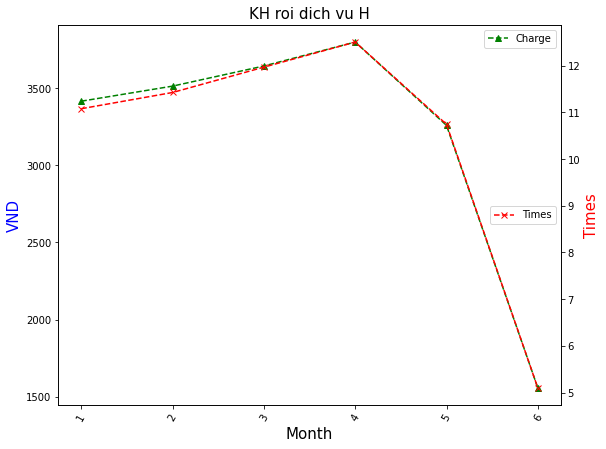

[4711.552518176975, 4628.103981134329, 4971.377995627447, 4916.068239073755, 4877.378792136564, 4724.102721841545]
[15.301591500685356, 15.106378727603127, 16.38503310696474, 16.273340075277602, 16.11928218385416, 15.457846105076104]


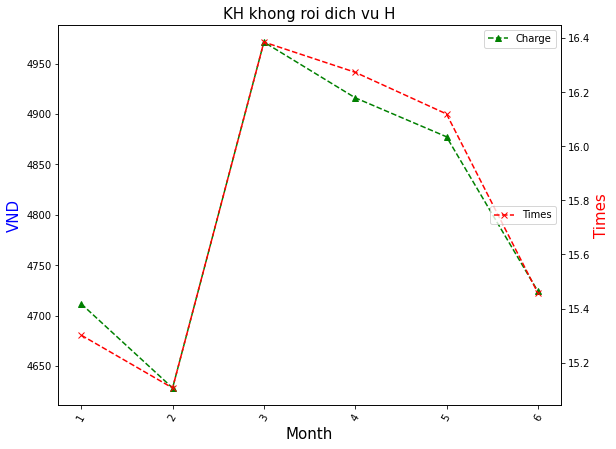

In [ ]:
draw_chart(cus_out, Rev_ChaH, Rev_TimeH, 'KH roi dich vu H')
draw_chart(cus_use, Rev_ChaH, Rev_TimeH, 'KH khong roi dich vu H')

#Service M

In [ ]:
#Tổng lượng hàng đã mua của dịch vụ M
Vol_M = data.iloc[:,132:138]
Rev_VolM = sorted(Vol_M, reverse=True)

In [ ]:
#Tổng số lần sử dụng M
Time_M = data.iloc[:,138:144]
Rev_TimeM = sorted(Time_M, reverse=True)

In [ ]:
#Tổng phí sử dụng M
Cha_M = data.iloc[:,144:150]
Rev_ChaM = sorted(Cha_M, reverse=True)

In [ ]:
def draw_chart(data_s, Cha_M, Vol_M, Time_M, title):
  charg = []
  times = []
  vol = []
  
  for col in Cha_M:
    if col in data_s.columns:
      charg.append(np.mean(data_s[col]))
  print(charg)
  for col in Vol_M:
    if col in data_s.columns:
      vol.append(np.mean(data_s[col]))
  print(vol)
  for col in Time_M:
    if col in data_s.columns:
      times.append(np.mean(data_s[col]))
  print(times)
  
  fig, ax = plt.subplots(figsize=[9, 7])
  
  ax.plot([1,2,3,4,5,6],
          charg,
          color='g', linestyle='--', marker='^', label = 'Charge')
  ax.plot([1,2,3,4,5,6],
          vol,
          color='b', linestyle='--', marker='o', label = 'Volume')
  plt.legend(loc='best')
  plt.xticks(rotation=60)
  ax.set_xlabel('Month', fontsize=15)
  ax.set_ylabel('VND',  color='blue', fontsize=15)
  
  ax2 = ax.twinx()
  ax2.plot([1,2,3,4,5,6],
          times,
          color='r', linestyle='--', marker='x', label='Times')

  ax2.set_ylabel('Times', color='red', fontsize=15)

  plt.title(title, fontsize=15)
  plt.legend(loc='right')
  plt.show()

[1049.0110789283135, 997.9111210972432, 1686.2121433743664, 2155.2985568854615, 2008.586465902798, 1029.368871235678]
[1345488754.1867785, 1369597353.551135, 1408548679.6251225, 1753181137.0647442, 1654565047.425395, 873985700.6757678]
[140.29088043617156, 128.90731354091238, 135.87080972867062, 127.53337308855475, 116.71874600672999, 68.511607104826]


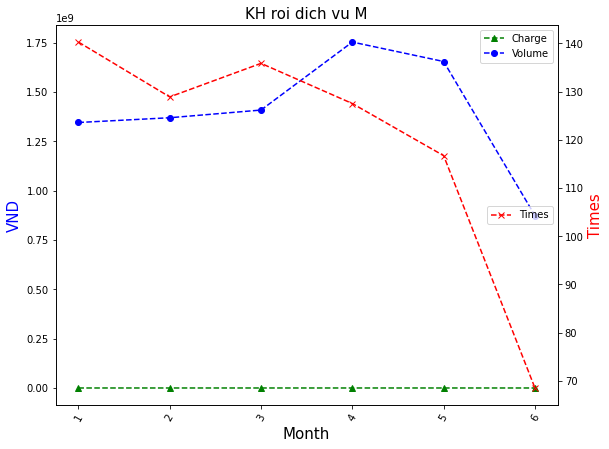

[1442.1000179152736, 1376.66866698144, 1341.2444915859749, 1309.66283163892, 1196.2968983930996, 1163.4444311986883]
[1429728554.0410845, 1453495738.8587663, 1519816354.2844832, 2003962931.2780528, 2193670708.4664345, 2220270448.528816]
[208.54317746493965, 202.3931256725201, 211.94608788637814, 205.00579874180139, 211.83422742230022, 211.67526264561036]


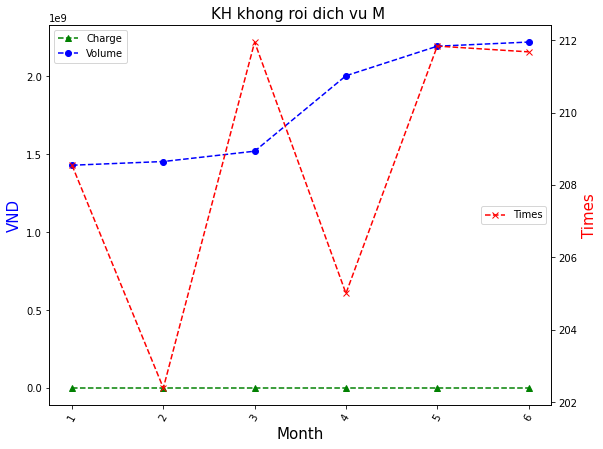

In [ ]:
draw_chart(cus_out, Rev_ChaM, Rev_VolM, Rev_TimeM, 'KH roi dich vu M')
draw_chart(cus_use, Rev_ChaM, Rev_VolM, Rev_TimeM, 'KH khong roi dich vu M ')

## PreProcessing

In [ ]:
zdata = (data == 0).sum(axis=0)
type(zdata)
zdata = zdata.tolist()

In [ ]:
zlist = []
for i in range(len(zdata)):
  ratio = zdata[i]/919361
  if ratio > 0.6:
    zlist.append(i)

In [ ]:
zlist

[96, 97, 98, 99, 100, 101, 144, 145, 146, 147, 148, 149, 150]

In [ ]:
(data.iloc[:, 100] == 0).sum(axis = 0)

746528

In [ ]:
# data = data.drop(data.columns[[98,99,100,101,102,103,146,147,148,149,150,151]], axis=1)

## Training data

In [ ]:
# X = data.drop(['churn'],axis=1)
# y = data.churn

# scaler = MinMaxScaler()
# x = scaler.fit_transform(X)
# y = scaler.fit_transform(np.array(y).reshape(-1, 1))

In [ ]:
# X.shape,y.shape

In [ ]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
# x_train.shape,x_test.shape

## LogisticRegreesion

In [ ]:
# from sklearn.linear_model import LogisticRegression
# lo = LogisticRegression()
# lo.fit(x_train, y_train)
# y_pred = lo.predict(x_test)

In [ ]:
# lo.score(x_test,y_test)

In [ ]:
#Drop cac cot nhieu so 0 0.97507
#K drop ra 0.97508

## NN


In [ ]:
# from keras.models import Sequential
# from keras.layers.core import Dense, Activation
# from keras import optimizers

In [ ]:
# model = Sequential([Dense(10, activation='sigmoid')])


# model.compile(loss='mse', optimizer='adam', metrics = ['mse', 'mae'])

In [ ]:
# history = model.fit(x_train, y_train, epochs= 10, validation_split=0.3)

In [ ]:
# history_df = pd.DataFrame(history.history)
# plt.plot(history_df['loss'], 'r', label = 'loss')
# plt.plot(history_df['val_loss'], 'b', label='val_loss')
# plt.legend()

##Note

In [ ]:
#su dung mo hinh roi danh gia dac trung, xem so lan dich khach hang su dung lan cuoi, so lan khach hang tu bo dich vu, phan tich tung dich vu
#Drop Id
#phan tich tung dich vu vd nhu dich vu A danh gia khach hang roi bo dich vu
#danh dia bang visulize
#understand dataset
#xay dung mo hinh khach hang roi bo dich vu (logi, nn, 
#danh gia tung dich vu xem 
#1: understand 2: mo hinh